In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # file system handling
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plots handling

In [2]:
data = pd.read_csv("SUV_Purchase.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.shape

(400, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [9]:
data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [10]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [11]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
data.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [12]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# Basic insights

In [13]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")
print(f"There are {data.isna().sum().sum()} missing values.")
print(f"{data.query('Purchased == 0').shape[0] / data.shape[0] * 100}% people purchased a SUC while {data.query('Purchased == 1').shape[0] / data.shape[0] * 100}% did not.")

There are 400 rows and 5 columns.
There are 0 missing values.
64.25% people purchased a SUC while 35.75% did not.


# Data visualization

In [15]:
WIDTH  = 20
HEIGHT = 6

def plot_vs(frame, col1, col2, hue):
    plt.figure(figsize=(WIDTH, HEIGHT * 2))
    sns.scatterplot(data=frame, x=col1, y=col2, hue=hue)
    plt.title(f"Scatter plot | {col1} vs {col2}")
    plt.show()
    
def boxplot_cat(frame, col1, hue):
    plt.figure(figsize=(WIDTH, HEIGHT))
    sns.boxplot(data=frame, x=col1, y=hue, orient="h")
    plt.title(f"Box plot | {col1} by {hue}")
    plt.show()

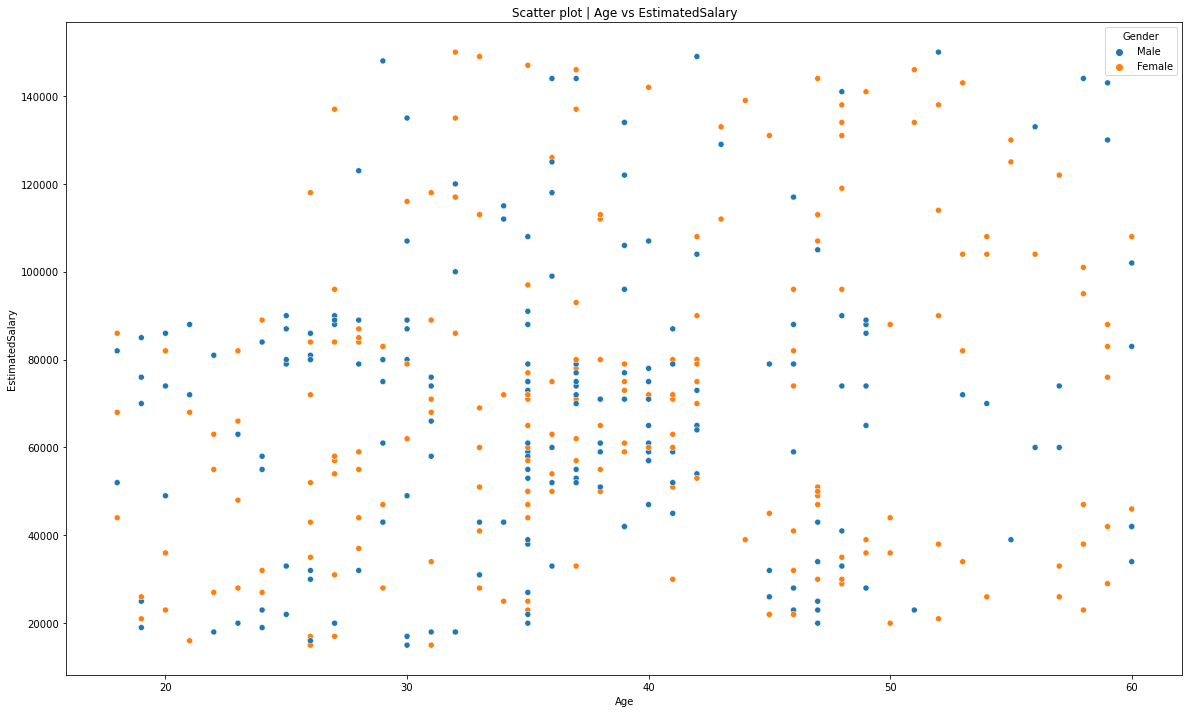

In [16]:
plot_vs(data, 'Age', 'EstimatedSalary', 'Gender')

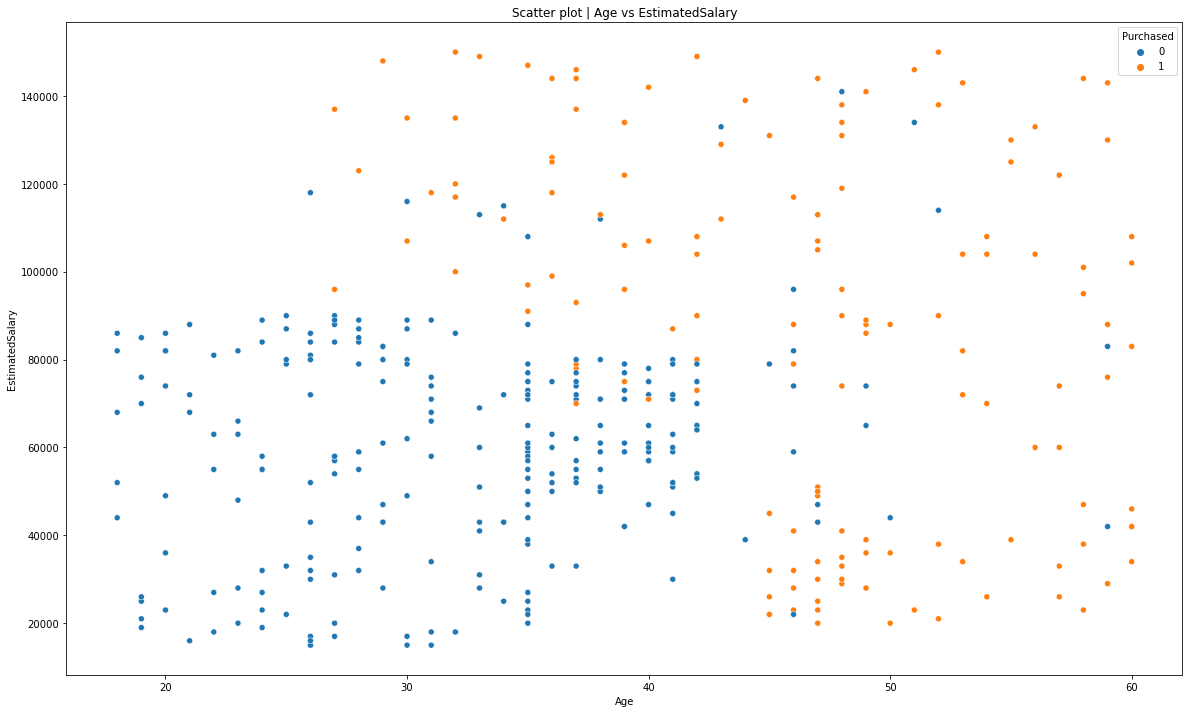

In [17]:
plot_vs(data, 'Age', 'EstimatedSalary', 'Purchased')

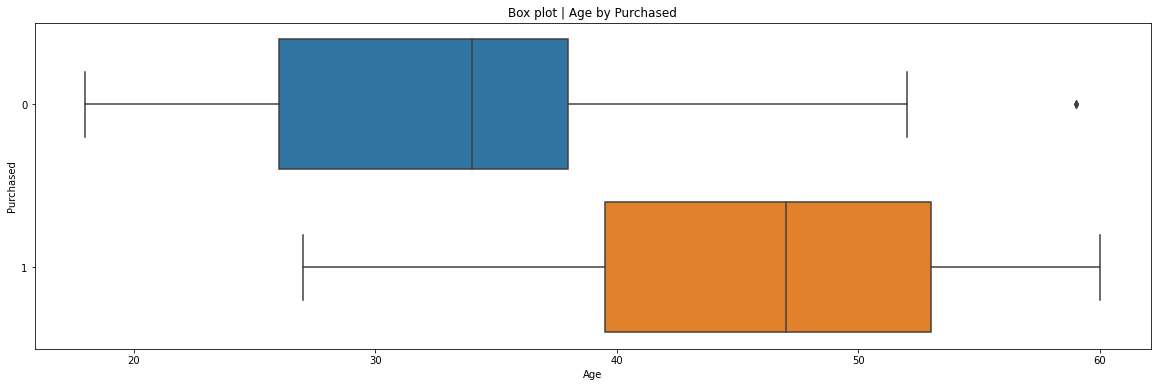

In [18]:
boxplot_cat(data, 'Age', 'Purchased')

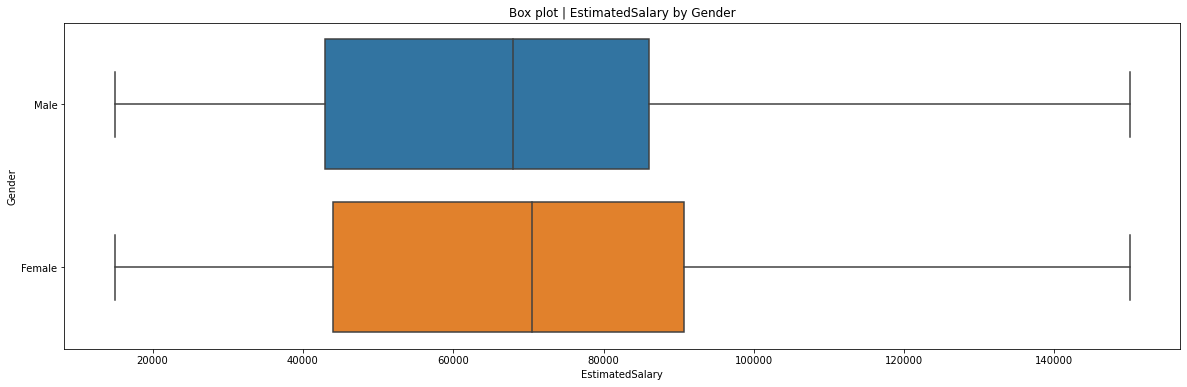

In [19]:
boxplot_cat(data, 'EstimatedSalary', 'Gender')

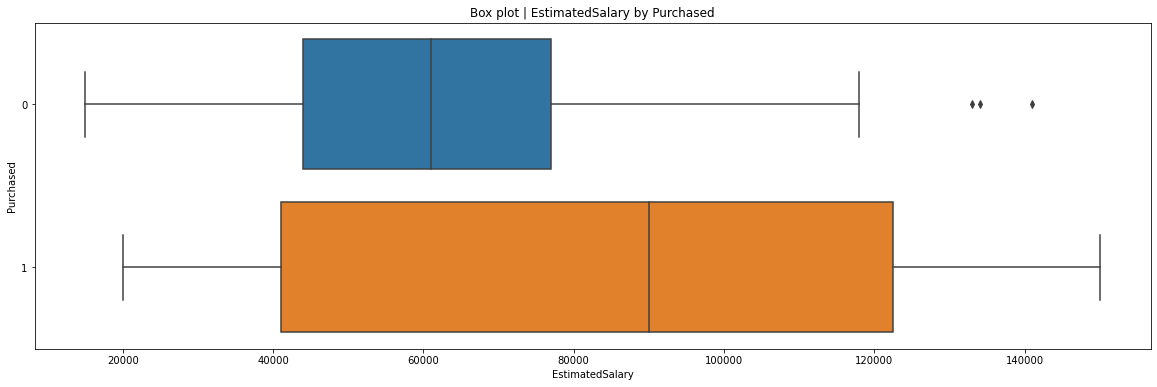

In [20]:
boxplot_cat(data, 'EstimatedSalary', 'Purchased')

In [21]:
# Create a copy
train = data.copy()

# EstimatedSalary : Outliers handling
train = train.drop(train.query("EstimatedSalary > 120000 and Purchased == 0").index)

# Age : Outliers handling
train = train.drop(train.query("Age > 55 and Purchased == 0").index)

# Gender : Binary encoding
gender = {"Male":0, "Female":1}
train  = train.replace({"Gender":gender})

In [22]:
model = data[['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']]

In [23]:
features = ['Gender', 'EstimatedSalary', 'Age']
target   = 'Purchased'

In [25]:
from sklearn.linear_model import LogisticRegressionCV


# Prepare features and target
X = train[features]
y = train[target]

In [26]:
model.Age

0      19
1      35
2      26
3      27
4      19
       ..
395    46
396    51
397    50
398    36
399    49
Name: Age, Length: 400, dtype: int64

In [27]:
model.Purchased.value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [30]:
# Model training
clf = LogisticRegressionCV(cv=5, random_state=42)

clf = clf.fit(X, y)

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

print(f"Accuracy  : {accuracy_score(y, clf.predict(X))}")
print(f"ROC score : {roc_auc_score(y, clf.predict(X))}")
print(f"F1  score : {f1_score(y, clf.predict(X))}")

Accuracy  : 0.8177215189873418
ROC score : 0.7573260073260072
F1  score : 0.6814159292035399


# Prediction Visualization

In [32]:
data['prediction'] = clf.predict(data.replace({"Gender":gender})[features])

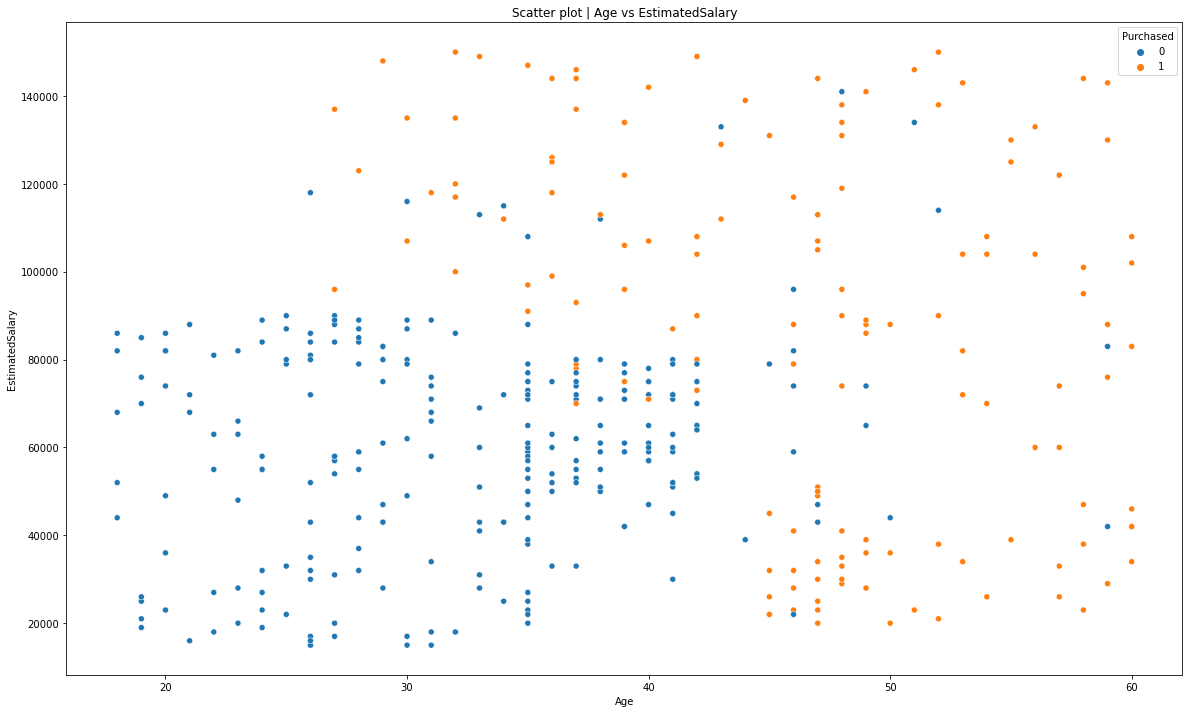

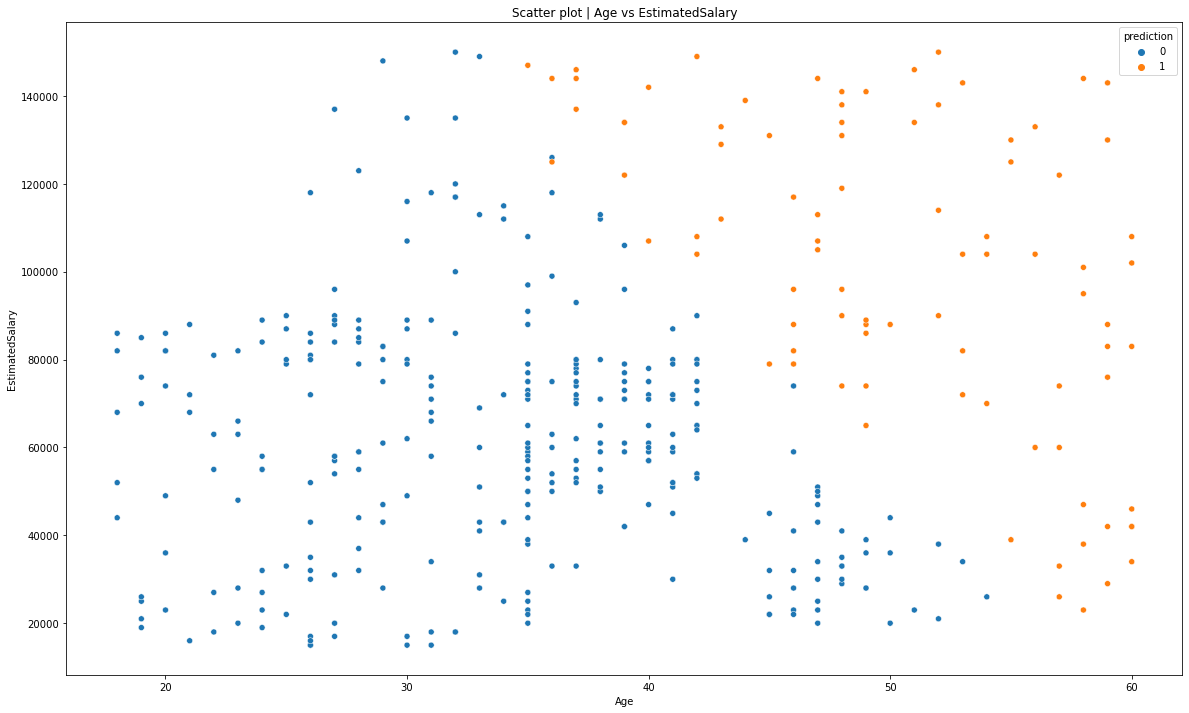

In [33]:
plot_vs(data, 'Age', 'EstimatedSalary', 'Purchased')
plot_vs(data, 'Age', 'EstimatedSalary', 'prediction')

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [35]:
# we scale the data here because estimated salary have too large values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(solver='liblinear')
log_reg_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [37]:
predictions = log_reg_model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        65
           1       0.79      0.79      0.79        34

    accuracy                           0.86        99
   macro avg       0.84      0.84      0.84        99
weighted avg       0.86      0.86      0.86        99



In [39]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, predictions)
a * 100

85.85858585858585

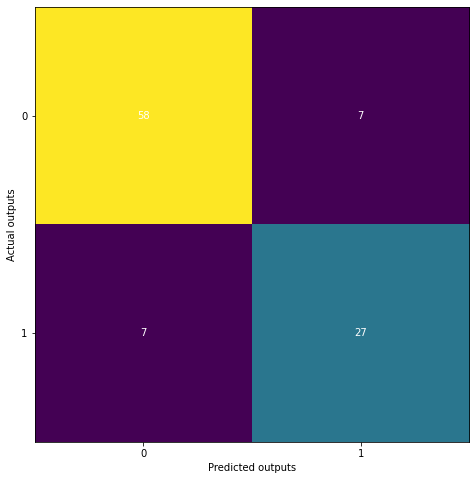

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()